<a href="https://colab.research.google.com/github/vinicius-mattoso/Exploratory-Data-Analysis-EDA-/blob/main/Handling_Missing_Values/Exercicio_Handling_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Exercícios do módulo
---

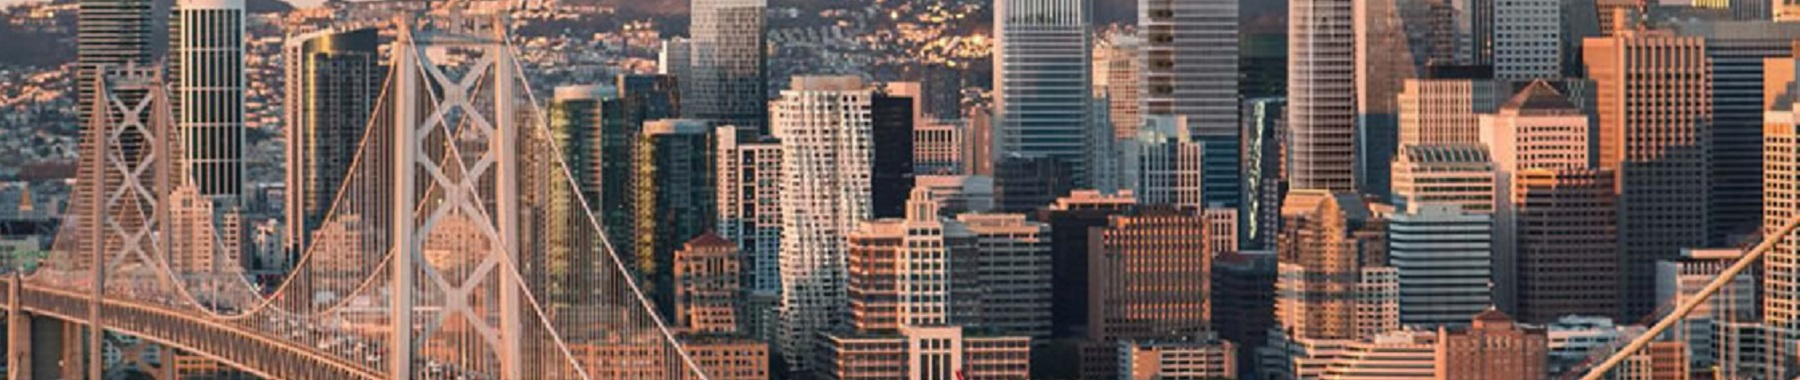

A Base de dados necessária para executar esse notebook é encontrada no kaggle:

https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
sf_permits = pd.read_csv("/content/Building_Permits.csv")

# set seed for reproducibility
np.random.seed(0) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1) Take a first look at the data

Run the next code cell to load in the libraries and dataset you'll use to complete the exercise.

In [ ]:
# TODO: Your code here!
sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11


# 2) How many missing data points do we have?

What percentage of the values in the dataset are missing?  Your answer should be a number between 0 and 100.  (If 1/4 of the values in the dataset are missing, the answer is 25.)

In [ ]:
# TODO: Your code here!
total_cells = np.product(sf_permits.shape)
missing_values_count = sf_permits.isnull().sum()
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100

print(percent_missing)

25.670524090352732


# 3) Figure out why the data is missing

Look at the columns **"Street Number Suffix"** and **"Zipcode"** from the [San Francisco Building Permits dataset](https://www.kaggle.com/aparnashastry/building-permit-applications-data). Both of these contain missing values. 
- Which, if either, are missing because they don't exist? 
- Which, if either, are missing because they weren't recorded?  

Once you have an answer, run the code cell below.

In [ ]:
# Check your answer (Run this code cell to receive credit!)
# get the number of missing data points per column
missing_values_count_street = sf_permits["Street Number Suffix"].isnull().sum()
missing_values_count_zipcode = sf_permits["Zipcode"].isnull().sum()
print(f'quantidade de valores nulos no Street Number: {missing_values_count_street}')
print(f'quantidade de valores nulos no zipcode: {missing_values_count_zipcode}')
print(f'Total de valores numa coluna: {sf_permits.shape}')

quantidade de valores nulos no Street Number: 20675
quantidade de valores nulos no zipcode: 175
Total de valores numa coluna: (20900, 43)


# 4) Drop missing values: rows

If you removed all of the rows of `sf_permits` with missing values, how many rows are left?

**Note**: Do not change the value of `sf_permits` when checking this.  

In [ ]:
# TODO: Your code here!
data_removed=sf_permits.dropna()
data_removed.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


# 5) Drop missing values: columns

Now try removing all the columns with empty values.  
- Create a new DataFrame called `sf_permits_with_na_dropped` that has all of the columns with empty values removed.  
- How many columns were removed from the original `sf_permits` DataFrame? Use this number to set the value of the `dropped_columns` variable below.

In [ ]:
# TODO: Your code here
sf_permits_with_na_dropped = sf_permits.dropna(axis=1)
# just how much data did we lose?
print("Columns in original dataset: %d \n" % sf_permits.shape[1])
print("Columns with na's dropped: %d" % sf_permits_with_na_dropped.shape[1])

dropped_columns = sf_permits.shape[1] - sf_permits_with_na_dropped.shape[1]

Columns in original dataset: 43 

Columns with na's dropped: 8


# 6) Fill in missing values automatically

Try replacing all the NaN's in the `sf_permits` data with the one that comes directly after it and then replacing any remaining NaN's with 0.  Set the result to a new DataFrame `sf_permits_with_na_imputed`.

In [ ]:
# TODO: Your code here
sf_permits_with_na_imputed = sf_permits.fillna(method='bfill', axis=0).fillna(0)

In [ ]:
sf_permits.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1.466911e+12
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1.468970e+12
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1.469035e+12
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1.469198e+12
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",1.469324e+11


In [ ]:
sf_permits_with_na_imputed.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,A,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,Y,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1.466911e+12
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,A,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1.468970e+12
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,A,Revere,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1.469035e+12
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,A,Fell,St,...,5.0,wood frame (5),5.0,wood frame (5),Y,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1.469198e+12
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,A,Alpine,Tr,...,5.0,wood frame (5),5.0,wood frame (5),Y,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",1.469324e+11
